In [5]:
import pandas as pd

df = pd.read_csv("Meteorite_Landings.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


## Data Cleaning (Phase 2)
Below is the code used to clean the dataset, including mass, year, and geolocation processing.


In [6]:
import pandas as pd
import numpy as np

# 读取原始数据
df = pd.read_csv("Meteorite_Landings.csv")
df_cleaned = df.copy()

# -----------------------------
# Clean mass
# -----------------------------
df_cleaned = df_cleaned[df_cleaned["mass (g)"].notna()]
df_cleaned = df_cleaned[df_cleaned["mass (g)"] > 0]
df_cleaned["log_mass"] = np.log(df_cleaned["mass (g)"])

# -----------------------------
# Clean year
# -----------------------------
df_cleaned["year"] = pd.to_datetime(df_cleaned["year"], errors="coerce").dt.year
df_cleaned = df_cleaned[df_cleaned["year"].notna()]
df_cleaned = df_cleaned[df_cleaned["year"] > 0]
df_cleaned["year"] = df_cleaned["year"].astype(int)

# -----------------------------
# Clean latitude & longitude
# -----------------------------
df_cleaned = df_cleaned[
    (df_cleaned["reclat"].notna()) &
    (df_cleaned["reclong"].notna()) &
    (df_cleaned["reclat"].between(-90, 90)) &
    (df_cleaned["reclong"].between(-180, 180))
]

# -----------------------------
# Filter fall categories
# -----------------------------
df_cleaned = df_cleaned[df_cleaned["fall"].isin(["Fell", "Found"])]

# Final check
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 38096 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38096 non-null  object 
 1   id           38096 non-null  int64  
 2   nametype     38096 non-null  object 
 3   recclass     38096 non-null  object 
 4   mass (g)     38096 non-null  float64
 5   fall         38096 non-null  object 
 6   year         38096 non-null  int64  
 7   reclat       38096 non-null  float64
 8   reclong      38096 non-null  float64
 9   GeoLocation  38096 non-null  object 
 10  log_mass     38096 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.5+ MB


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,log_mass
0,Aachen,1,Valid,L5,21.0,Fell,1970,50.77500,6.08333,"(50.775, 6.08333)",3.044522
1,Aarhus,2,Valid,H6,720.0,Fell,1970,56.18333,10.23333,"(56.18333, 10.23333)",6.579251
2,Abee,6,Valid,EH4,107000.0,Fell,1970,54.21667,-113.00000,"(54.21667, -113.0)",11.580584
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1970,16.88333,-99.90000,"(16.88333, -99.9)",7.556951
4,Achiras,370,Valid,L6,780.0,Fell,1970,-33.16667,-64.95000,"(-33.16667, -64.95)",6.659294


phase3

Matplotlib is building the font cache; this may take a moment.


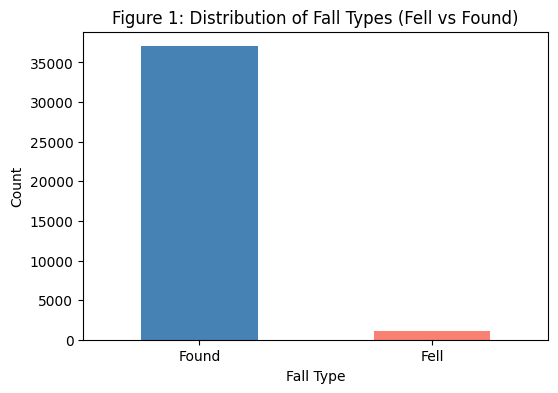

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_cleaned["fall"].value_counts().plot(kind="bar", color=["steelblue", "salmon"])
plt.title("Figure 1: Distribution of Fall Types (Fell vs Found)")
plt.xlabel("Fall Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


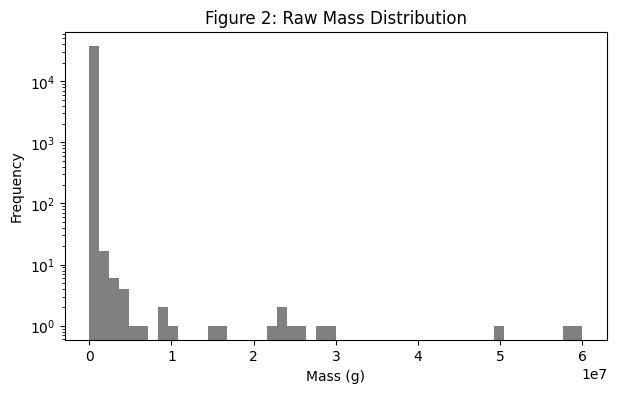

In [9]:
plt.figure(figsize=(7,4))
plt.hist(df_cleaned["mass (g)"], bins=50, color="gray")
plt.title("Figure 2: Raw Mass Distribution")
plt.xlabel("Mass (g)")
plt.ylabel("Frequency")
plt.yscale("log")   # 用 log scale 更好看
plt.show()


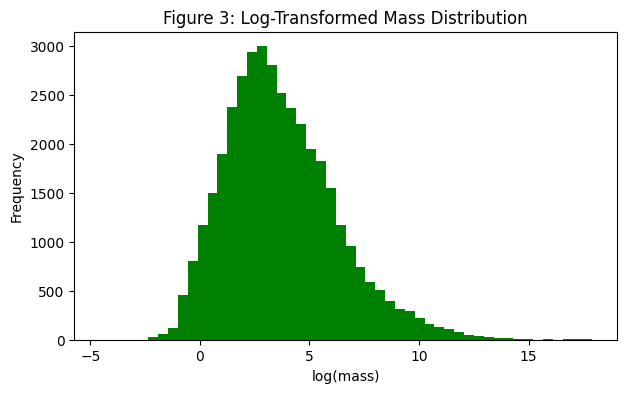

In [10]:
plt.figure(figsize=(7,4))
plt.hist(df_cleaned["log_mass"], bins=50, color="green")
plt.title("Figure 3: Log-Transformed Mass Distribution")
plt.xlabel("log(mass)")
plt.ylabel("Frequency")
plt.show()


<Figure size 1000x500 with 0 Axes>

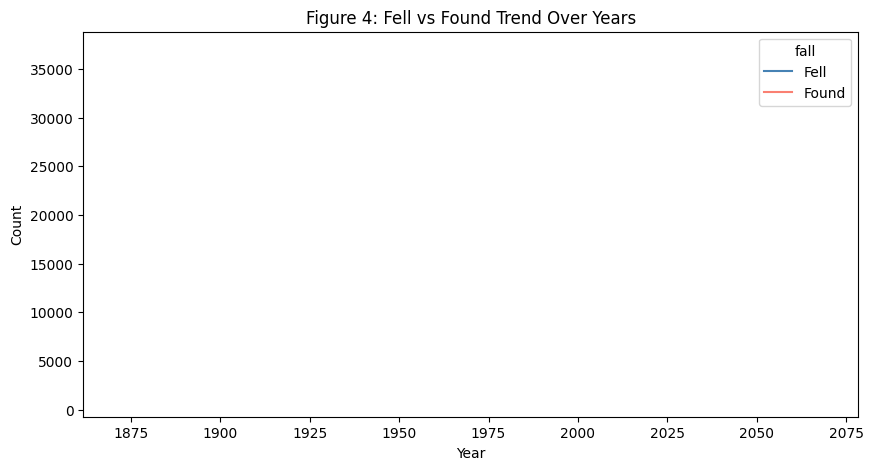

In [11]:
plt.figure(figsize=(10,5))

df_cleaned.groupby("year")["fall"].value_counts().unstack().fillna(0).plot(
    figsize=(10,5),
    color=["steelblue", "salmon"]
)
plt.title("Figure 4: Fell vs Found Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


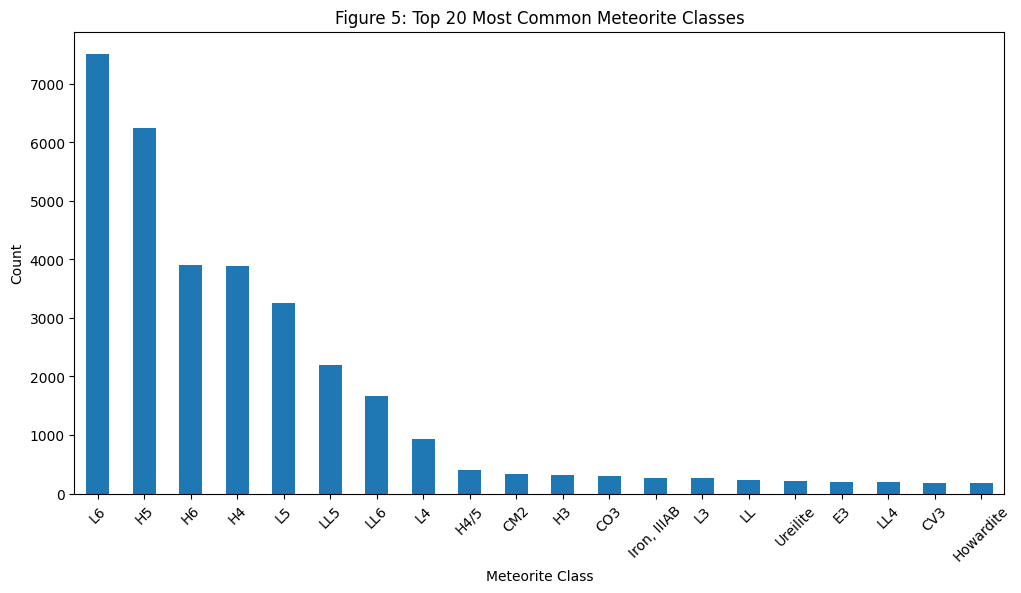

In [12]:
plt.figure(figsize=(12,6))
df_cleaned["recclass"].value_counts().head(20).plot(kind="bar")
plt.title("Figure 5: Top 20 Most Common Meteorite Classes")
plt.xlabel("Meteorite Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


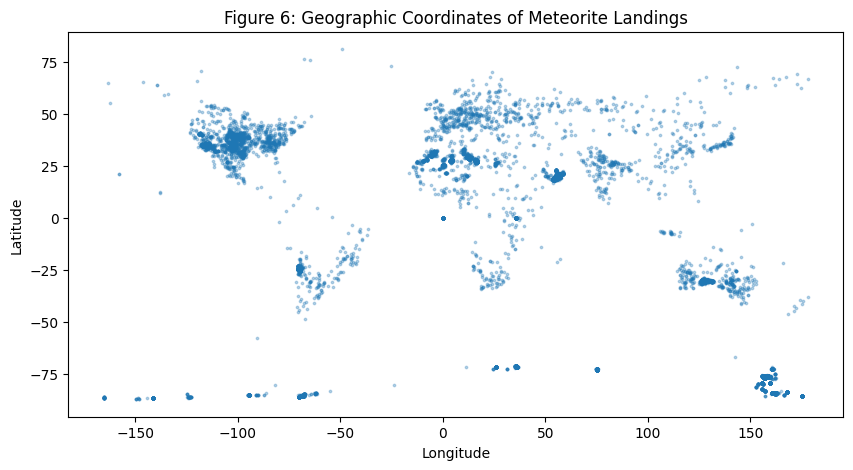

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df_cleaned["reclong"], df_cleaned["reclat"], s=3, alpha=0.3)
plt.title("Figure 6: Geographic Coordinates of Meteorite Landings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<Figure size 700x500 with 0 Axes>

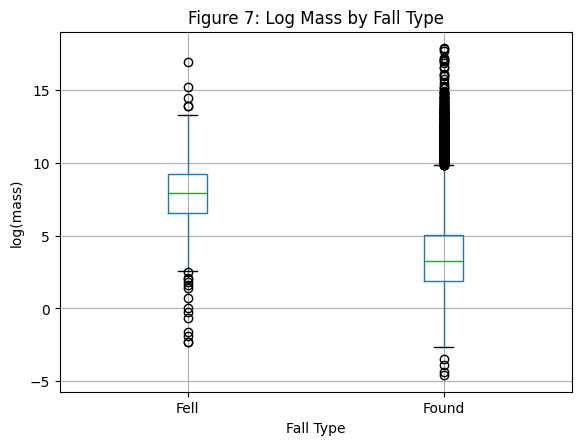

In [14]:
plt.figure(figsize=(7,5))
df_cleaned.boxplot(column="log_mass", by="fall")
plt.title("Figure 7: Log Mass by Fall Type")
plt.suptitle("")
plt.xlabel("Fall Type")
plt.ylabel("log(mass)")
plt.show()


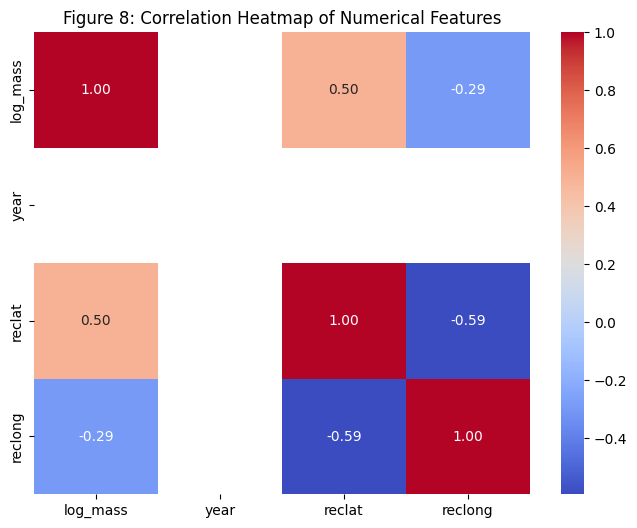

In [16]:
import seaborn as sns

plt.figure(figsize=(8,6))
corr = df_cleaned[["log_mass", "year", "reclat", "reclong"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 8: Correlation Heatmap of Numerical Features")
plt.show()
